# Data-Driven Analytics of Email Marketing Performance

By: David Lee

October 23, 2016

## Contents

- Introduction
 - Background
 - Summary of Findings
- Library Import and Configuration
- Data
 - Cleaning
- Analysis
 - Exploratory Analysis
 - Optimizations
- Conclusions
 - Recommendations

## Introduction

### Background

Over the past several decades, email has evolved to become ubiquitous in daily life. Globally, about 200 billion emails are sent and recieved every day, and about half of all emails sent are directed toward consumers. 

Despite being one of the earliest forms of digital marketing, email continues to be popular because it is highly effective. The low cost to develop and maintain an email campaign means that email marketing is a viable strategy for businesses of all sizes. Moreover, unlike print and other traditional direct marketing strategies, email marketing enables businesses to easily track various measures of customer engagement which provide valuable information used to drive the continuous improvement of business processes. When properly executed and optimized, email marketing possesses the demonstrated potential to outperform most other marketing strategies in the achievement of objectives such as lead generation and return on investment.

A common starting point for the evaluation of campaign effectiveness involves the collection of high level engagement data, such as those relating to  email opens, clicks, and unsubscriptions, throughout the campaign life cycle. When tracked and analyzed, these metrics yield key performance indicators (KPIs) that enable businesses to better understand consumer behavior and personalize content tailored to their wants and needs.

In this project, the objective is to use campaign data to gain insight into the effectiveness of an organization's email marketing processes. Beginning with the extraction of basic KPIs from the data, we can obtain "at-a-glance" visibility into the levels of engagement generated by our campaign. Then, guided by those initial insights, we begin a deep dive into campaign effectiveness. By evaluating trends and patterns in the data, we will identify successes and deficiencies in existing business processes and use these findings to yield hypotheses and recommendations for process improvement.

### Summary of Findings

1) When compared with industry benchmarks, we see that the open rates for our campaign exceed the average. High open rates are often signs of successful email subject lines and targetting. However, the data suggests that additional optimizations can be made. In order to further improve the likelihood of initial engagement, it may be beneficial to continue testing on variables such as timing and frequency to increase both visibility and impact moving forward.

2) In contrast, when compared with industry benchmarks, we see that the click-through rates for our campaign are significantly lower than average. This result is surprising, given our high open rates. The data indicates that this is likely caused by problems related to email content. Subscribers show high rates of initial engagement, but choose not to continue engaging further. Several content improvement recommendations, such as embedding more frequent (and possibly even redundant) links to the target sites, being more descriptive with link destinations, and testing of  and optimization of content blocks could help drive higher levels of engagement.

3) Though the high level metrics tracked by the organization are excellent starting points for understanding campaign effectiveness, in order to more profoundly understand the impact that the campaigns have on goals and targets, the data should be connected with lower level metrics in the marketing funnel. This can be achieved by integrating our email platform with our website, allowing us to track outcomes beyond the email click, such as leads, sales, and return on investment. 

## Library Import and Configuration

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from matplotlib import rcParams
from palettable.colorbrewer.qualitative import Dark2_7
from palettable.colorbrewer.sequential import BuGn_5

# Set some matplotlib defaults
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 90
rcParams['axes.color_cycle'] = Dark2_7.mpl_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = Dark2_7.mpl_colors[0]
rcParams['axes.grid'] = False


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

/home/david-ubuntu/anaconda3/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data

The data was sourced from an organization in the health industry. The data contains information about email campaigns sent by the organization to its subscriber mailing list. The data sample consists of 296,174 observations and includes information regarding:
- __send_time__: timestamp data reflecting the date and time in which a campaign was delivered.
- __open_time__: timestamp data reflecting the date and time in which a campaign was opened.
- __sends__: binary data reflecting whether or not a campaign was successfully delivered.
- __opens__: binary data reflecting whether or not a campaign was opened.
- __clicks__: binary data reflecting whether or not a link in the body of the campaign was clicked.
- __unsubs__: binary data reflecting whether or not a subscriber clicked the unsubscription button in the body of the campaign to discontinue the subscription.

For all binary variables, a value of 1 indicates success and 0 indicates failure. No personal information or identifiers were shared or used for analysis.

Prior to analysis, it is essential to examine the data and assess its quality. In the process, we perform some minor data manipulation and preprocessing to prepare for analysis. 

In [4]:
emails = pd.read_csv("data/email_data.csv")
print 'Number of observations:', emails.shape[0]
emails.head()


Number of observations: 296174


,send_time,open_time,sends,opens,clicks,unsubs
0,2014-03-17 15:36:44.874541+0000,2014-03-17 15:39:26.820882+0000,1,1,1,0
1,2014-03-17 16:58:14.676486+0000,NaN,1,0,0,0
2,2014-03-17 16:58:15.389193+0000,NaN,1,0,0,0
3,2014-03-17 16:58:35.056325+0000,NaN,1,0,0,0
4,2014-03-17 16:58:35.396159+0000,2014-03-17 17:13:19.616974+0000,1,1,0,0


### Cleaning

We begin by examining the data types of the tracked variables for type consistency.

In [5]:
emails.dtypes

send_time    object
open_time    object
sends         int64
opens         int64
clicks        int64
unsubs        int64
dtype: object

We see that `send_time` and `open_time` are interpreted by Python as general object types. This may be an indication of the presence of hetergeneous elements stored in the variable, which could be problematic. On the other hand, all of the binary variables are interpreted as integer types, as expected. 

We can attempt to force a conversion of the data stored in the `send_time` and `open_time` variables into Python datetime objects and see if any errors are raised due to type incompatibility.

In [6]:
emails['send_time'] = pd.to_datetime(emails.send_time, utc=True)
emails['open_time'] = pd.to_datetime(emails.open_time, utc=True)

In [7]:
emails.dtypes

send_time    datetime64[ns, UTC]
open_time    datetime64[ns, UTC]
sends                      int64
opens                      int64
clicks                     int64
unsubs                     int64
dtype: object

The conversion was successful and no errors were raised, suggesting that all of the elements stored in the `send_time` and `open_time` variables were compatible with the datetime data type.

Before moving on to additional cleaning and examination, we should convert the timezones of the datetime data (currently in UTC) into the timezone local to the organization (America/Eastern Time).

In [8]:
emails['send_time'] = emails.send_time.dt.tz_convert('America/New_York')
emails['open_time'] = emails.open_time.dt.tz_convert('America/New_York')
emails.head()

,send_time,open_time,sends,opens,clicks,unsubs
0,2014-03-17 11:36:44.874541-04:00,2014-03-17 11:39:26.820882-04:00,1,1,1,0
1,2014-03-17 12:58:14.676486-04:00,NaT,1,0,0,0
2,2014-03-17 12:58:15.389193-04:00,NaT,1,0,0,0
3,2014-03-17 12:58:35.056325-04:00,NaT,1,0,0,0
4,2014-03-17 12:58:35.396159-04:00,2014-03-17 13:13:19.616974-04:00,1,1,0,0


It would also be helpful to compute some additional metrics to assist with further cleaning and analysis. These metrics will be denoted as:
- __waiting_time__: timedelta data that reflects the amount of time elapsed between campaign delivery and opening.
- __send_day__: integer-valued data that reflects the day of week a campaign was delivered (0=Sunday, 1=Monday,..., 6=Saturday).
- __open_day__: integer-valued data that reflects the day of week a campaign was opened (0=Sunday, 1=Monday,..., 6=Saturday).
- __send_date__: data that reflects the date a campaign was delivered.

In [9]:
emails['waiting_time'] = emails.open_time - emails.send_time
emails['send_day'] = emails.send_time.dt.dayofweek
emails['open_day'] = emails.open_time.dt.dayofweek
emails['send_date'] = emails.send_time.dt.date

As a cleaning step, it is helpful to examine the range of possible values for the variables we track and confirm that they agree with our expectations.

In [10]:
print 'Range of values:'
print 'send_time:', str((emails.send_time.min(), emails.send_time.max()))
print 'open_time:', str((emails.open_time.min(), emails.open_time.max()))
print 'waiting_time:', str((emails.waiting_time.min(), emails.waiting_time.max()))
print 'sends:', str(emails.sends.unique())
print 'opens:', str(emails.opens.unique())
print 'clicks:', str(emails.clicks.unique())
print 'unsubs:', str(emails.unsubs.unique())

Range of values:
send_time: (Timestamp('2014-03-17 11:36:44.874541-0400', tz='America/New_York'), Timestamp('2014-03-23 16:31:12.031722-0400', tz='America/New_York'))
open_time: (Timestamp('2014-03-17 11:39:26.820882-0400', tz='America/New_York'), Timestamp('2014-03-25 18:25:58.724246-0400', tz='America/New_York'))
waiting_time: (Timedelta('-1 days +20:34:16.574493'), Timedelta('8 days 04:26:00.294180'))
sends: [1 2]
opens: [1 0]
clicks: [1 0]
unsubs: [0 1]


We see some signs of bad data. In our data set, there exists data with negatively-valued `waiting_time`, which is illogical. Moreover, there are entries which report a `sends` value of 2, which is meaningless, given that it is outside of the range of unique values possible for the binary variable.

We should examine the bad data to see if they reveal a meaningful pattern.

In [11]:
emails[emails.waiting_time < datetime.timedelta(days=0)]

,send_time,open_time,sends,opens,clicks,unsubs,waiting_time,send_day,open_day,send_date
155941,2014-03-21 12:40:43.425507-04:00,2014-03-21 09:15:00-04:00,1,1,0,0,-1 days +20:34:16.574493,4,4.0,2014-03-21


For the case of the negative `waiting-time`, there is only one observation. Inspection of the original dataset reveals that the `send_time` for this observation was formatted differently from the other data, suggesting the possibility of tampering or erroneous data collection. Regardless, the observation is unusable and will be discarded. 

In [12]:
emails[emails.sends==2]

,send_time,open_time,sends,opens,clicks,unsubs,waiting_time,send_day,open_day,send_date
16109,2014-03-17 14:05:53.145257-04:00,NaT,2,0,0,0,NaT,0,NaN,2014-03-17
34432,2014-03-18 13:47:18.484798-04:00,NaT,2,0,0,0,NaT,1,NaN,2014-03-18
49115,2014-03-18 15:40:42.818769-04:00,NaT,2,0,0,0,NaT,1,NaN,2014-03-18
55885,2014-03-18 15:44:54.740252-04:00,NaT,2,0,0,0,NaT,1,NaN,2014-03-18
57883,2014-03-18 15:46:08.497952-04:00,NaT,2,0,0,0,NaT,1,NaN,2014-03-18
81403,2014-03-19 14:08:46.084247-04:00,NaT,2,0,0,0,NaT,2,NaN,2014-03-19
86385,2014-03-19 14:11:41.665451-04:00,NaT,2,0,0,0,NaT,2,NaN,2014-03-19
100917,2014-03-19 14:20:51.171978-04:00,NaT,2,0,0,0,NaT,2,NaN,2014-03-19
107822,2014-03-20 12:03:19.095975-04:00,NaT,2,0,0,0,NaT,3,NaN,2014-03-20
135675,2014-03-20 13:42:01.452936-04:00,NaT,2,0,0,0,NaT,3,NaN,2014-03-20


The data reveals 13 seemingly random instances in which the `send_time` equals 2. However, there is a noticeable pattern in which all of the instances are associated with unopened campaigns. This pattern suggests that there may be an underlying meaning to the value. It may represent an outcome such as unsuccessful delivery, bounce (e.g. due to invalid email addresses), or filtering as spam. However, in the current situation, it is not possible to uncover the meaning of this value. While it is recommended that these data be examined further as a next step, they are currently meaningless and will be discarded as a result.

In [13]:
# Discard bad data.
emails = emails.drop(emails[emails.waiting_time < datetime.timedelta(days=0)].index)
emails = emails.drop(emails[emails.sends==2].index)
print 'Number of observations after cleaning:', emails.shape[0]

Number of observations after cleaning: 296160


This concludes our cleaning steps. We have arrived at a clean and preprocessed data set of 296,160 observations which will move forward to the analysis stage.

## Analysis

### Exploratory Analysis

An excellent starting point for understanding campaign effectiveness is the computation of KPIs from our data. 
These include:

- __open rate__: a percentage that tells you how many successfully delivered campaigns were opened by subscribers.
- __click-through rate (CTR)__: a percentage that tells you how many successfully delivered campaigns registered at least one click on a link.
- __click-to-open rate (CTOR)__: a percentage that tells you how many subscribers clicked on at least one link out of the set of those who opened the email. 
- __churn rate__: a percentage that tells you how many recipients discontinue their subscriptions (unsubscribe).

For this analysis, though we will report metrics related to unsubscriptions, we will focus the majority of our discussion on effectiveness in terms of opens and clicks.

Note that click-to-open rate (CTOR) is different from click-through rate (CTR). The CTOR only includes the actions of those who opened the email, while the CTR takes into account all of the actions in the inbox. For example, suppose that 100 emails were sent to 100 recipients. Of those 100 recipients, 20 of them opened the email and 10 of them clicked. This yields a CTR of 10% and a CTOR of 50%. As a result, CTOR is a more controlled measure of email content effectiveness than CTR, which measures overall performance and is influenced by many other confounding variables.

We will begin by evaluating our KPIs against averages experienced by similar organizations in the industry as well as historical averages experienced within the organization. Through this, we can identify strengths and weaknesses in our existing processes and use these insights to guide the direction of further analysis and decision-making.

In [14]:
def print_summary(data):
    print '########################## Summary Statistics #########################'
    print 'Send Count:', data.sends.sum()
    print 'Open Count:', data.opens.sum()
    print 'Click count:', data.clicks.sum()
    print 'Unsub count:', data.unsubs.sum()
    print 'Open Rate: %0.2f' % (data.opens.mean()*100) + '%'
    print 'Click-through rate: %0.2f' % (data.clicks.mean()*100) + '%'
    print 'Click-to-Open Rate: %0.2f' % (data[data.opens==1].clicks.mean()*100) + '%'
    print 'Churn rate: %0.2f' % (data.unsubs.mean()*100) + '%'
    print 'Percent of clicks that result in unsubscription: %0.2f' % (emails[emails.clicks==1].unsubs.mean()*100) + '%'
    print '#######################################################################'

In [15]:
def daily_metrics(data, metric, date_string, date_format):
    """
    Function
    --------
    daily_metrics
    
    Prints and returns key performance indicator associated with the specified metric for the given date.
    
    Parameters
    ----------
    data: DataFrame
        A DataFrame of email data. The dataframe has rows:
        send_time, open_time, sends, opens, clicks, unsubs, waiting_time, send_day, open_day, and send_date.
    metric: string
        The name of the metric, from the list:
        opens, clicks, and unsubs.
    kind: string
        The kind of plot you want (see pandas.DataFrame.plot documentation for options)
    date_string: string
        The date of interest.
    date_format: string
        The formatting of the given date.

    Returns
    -------
    current, expected: tuple
        A tuple storing the current KPI value and historical KPI value.
    
    """

    date_dt = datetime.datetime.strptime(date_string, date_format).date()
    current = data[data.send_date == date_dt][metric].mean()
    expected = data[data.send_date < date_dt][metric].mean()

    full_date = date_dt.strftime("%A, %B %d, %Y")    
    print("----%s: %s----" %(metric.title(), full_date))
    print("Current rate: %0.2f" %(current*100) + "%" +  "\nHistorical rate: %0.2f" %(expected*100) + "%\n")
    return (current, expected)
    []

In [16]:
print_summary(emails)

########################## Summary Statistics #########################
Send Count: 296160
Open Count: 74922
Click count: 5139
Unsub count: 115
Open Rate: 25.30%
Click-through rate: 1.74%
Click-to-Open Rate: 6.86%
Churn rate: 0.04%
Percent of clicks that result in unsubscription: 2.24%
#######################################################################


In [17]:
# daily_metrics demonstration
ctr = daily_metrics(emails, 'clicks', '2014-3-23', '%Y-%m-%d')
opr = daily_metrics(emails, 'opens', '2014-3-23', '%Y-%m-%d')
unr = daily_metrics(emails, 'unsubs', '2014-3-23', '%Y-%m-%d')


----Clicks: Sunday, March 23, 2014----
Current rate: 1.72%
Historical rate: 1.74%

----Opens: Sunday, March 23, 2014----
Current rate: 21.96%
Historical rate: 26.08%

----Unsubs: Sunday, March 23, 2014----
Current rate: 0.05%
Historical rate: 0.04%



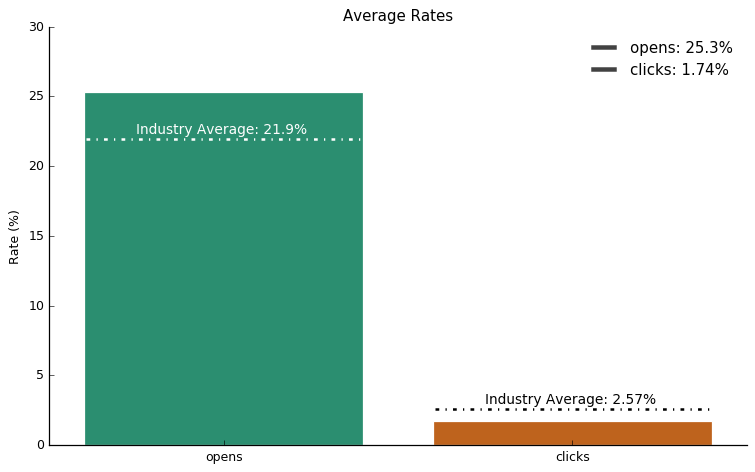

In [18]:
ax = sns.barplot(x = ['opens', 'clicks'], y = [100*emails.opens.mean(), 100*emails.clicks.mean()])
clicks_bm = 2.57
opens_bm = 21.93
ax.axhline(y = opens_bm, xmin=0.053, xmax=0.447, linestyle='-.', color='w')
ax.text(y=opens_bm+0.4, x=-.25, s='Industry Average: %0.1f%%' %(opens_bm), color='w', size=11)
ax.axhline(y = clicks_bm, xmin=0.553, xmax=0.947,linestyle='-.', color='k')
ax.text(y=clicks_bm+0.4, x=.75, s='Industry Average: %0.2f%%' %(clicks_bm), color='k', size=11)

ax.set_ylabel('Rate (%)')
ax.set_title("Average Rates")
ax.legend(['opens: %0.1f' %(emails.opens.mean()*100) + "%", 'clicks: %0.2f' %(emails.clicks.mean()*100) + "%"], frameon=False, loc='upper right')
remove_border()

In our analysis, we use industry-wide performance to provide context for our outcomes. The industry averages are representative of a wide spectrum of organizations, ranging from small startups to Fortune 500 companies (Source: MailChimp, updated February 2017). Thus, they serve as useful benchmarks for comparison.

One insight clearly visible at this stage is that open rates are particularly high when compared with others in the health industry. Open rates reflect the levels of initial engagement from email recipients in our subscriber list. Thus, high open rates are signs of success. Our high open rates are likely indications that we make use of well-designed subject lines which attract the interest of our recipients. Our rates are also signs that we employ effective segmentation and targeting strategies which allow us to cater subject lines and marketing processes to match the interests of a diverse demographic.

However, our successes in open rates are contrasted by our apparent failures in click-through rates. Click-through rates reflect the levels of continued engagement with email contents after viewing. When compared with others in the industry, our click-through rates are strikingly low, especially given our high rates of initial engagement. Many factors, some of which we will investigate further, may have contributed to this result. However, these results are most likely caused by the presence of email contents which do not effectively prompt extended interest or engagement. 

We will use these initial insights to guide deeper analysis. However, given that we do not currently possess information on factors such as contents and design, we cannot directly analyze their impacts on campaign effectiveness. Nonetheless, with the current data, we are still able to analyze the impacts from other factors, such as timing and frequency. If we see that these factors have a small effect, then we can rule them out and focus future analysis and optimization efforts on inefficiencies caused by factors not currently being monitored, such as those related to content. 

We will now analyze the potential impacts of delivery timings on campaign effectiveness. Timings can significantly impact the likelihood of subscriber engagement because a recipient's activity fluctuates throughout the day. Furthermore, emails must compete for visibility and attention in a recipient's busy inbox. Therefore, when considered in combination with other interest-related factors such as subject lines and contents, the timings of delivery can have considerable effects on engagement. 

### Optimizations

In [19]:
def plot_rates(data, grp_by, kind='line'):
    """
    Function
    --------
    plot_rates
    
    Produces figures of the open and click-through rates grouped by a specified variable.
    
    Parameters
    ----------
    data: DataFrame
        A DataFrame of email data. The dataframe has rows:
        send_time, open_time, sends, opens, clicks, unsubs, waiting_time, send_day, open_day, and send_date.
    grp_by: string
        The name of the variable you want to group by, from the list of:
        send_date and send_time.
    kind: string
        The kind of plot you want (see pandas.DataFrame.plot documentation for options).
    Returns
    -------
    ax: matplotlib.AxesSubplot
    
    """
    
    if grp_by == 'send_time':
        grouped_data = data.groupby(data[grp_by].dt.hour)
    else:
        grouped_data = data.groupby(data[grp_by])
    rates = 100*grouped_data.agg({'opens': np.mean, 'clicks': np.mean})[grouped_data.size() >10]
    ax = rates.plot(kind=kind, style='o-', grid=True, legend='reverse')
    ax.set_ylabel('rates (%)')
    remove_border()
    
    return ax

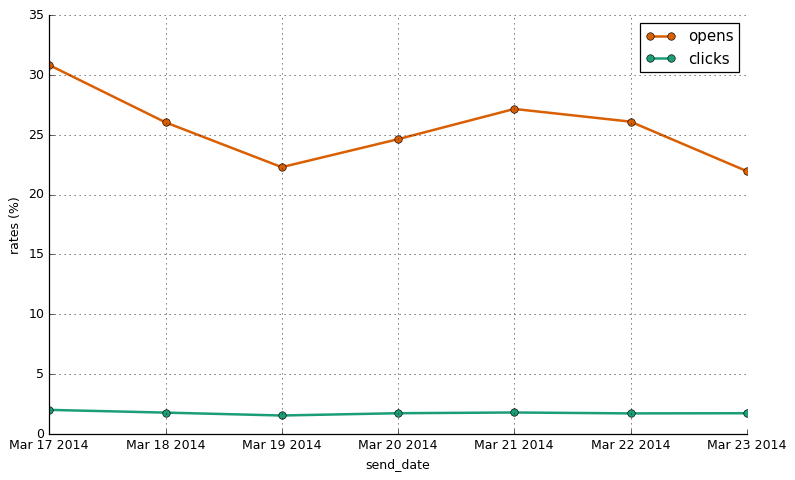

In [20]:
plot_rates(emails, 'send_date')

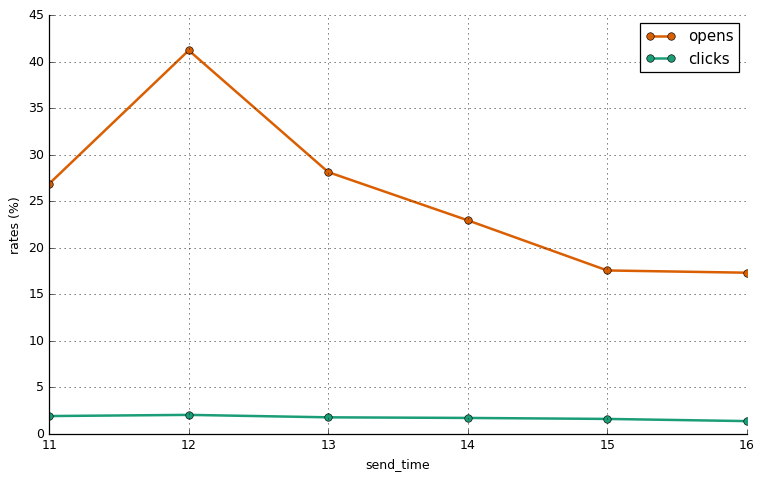

In [21]:
plot_rates(emails, 'send_time')

In [22]:
grouped_data = emails.groupby(emails.send_time.dt.hour)
rates = grouped_data.agg({'opens': np.mean, 'clicks': np.mean})[grouped_data.size() > 10]*100
rates['click-to-open'] = rates.clicks/rates.opens*100
rates

,clicks,opens,click-to-open
send_time,,,
11,1.902584,26.889315,7.075615
12,2.029568,41.224444,4.923216
13,1.765599,28.133938,6.275690
14,1.700105,22.949423,7.408052
15,1.594032,17.558623,9.078341
16,1.359188,17.316057,7.849294


Here, we see the trends of click-through and open rates over time. As more data is made available, we will likely more interesting trends. However, at the moment, there are still some noteworthy patterns visible from the figures. We can see that, as expected, open rates fluctuate depending on the time of delivery. In contrast, click-through rates stay unexpectedly constant, regardless of timing and open rate. Given our current operations, while there appears to be a minor association between open rates and click-through rates, it does not seem that open rates are limiting factors to click-through rates. In other words, it seems that the issue is not that the campaign contents are being unseen. Rather, the issue is likely that the content itself does not inspire deeper engagement or interest.  We will further consider this hypothesis soon, but for the moment, we will focus on open rates.

Though the effects are small, we do see that open rates have positive effects on click-through rate. As a result, it would be in our best interest to optimize open rates any way we can. Based on these data, we see that timings do have clear impacts on open rates. Nearly all of our emails are sent in a single timing window from 11-4 PM ET every day of the week. For open rates, there is a clear maximum associated with emails delivered around 12 PM. After that peak, the open rates decrease monotonically for emails delivered later in the day. Thus, it may be useful to conduct tests for different delivery windows to optimize open rates. Given that the highest open rates are associated with emails sent at 12 PM, we should consider testing delivery 
windows shifted to center around the time of peak activity, such as a window from 10-3 PM.

Before moving forward, it is worth taking a detour to have a closer look at how the activity of both our campaign and our recipients varies on the daily level. This gives us a better sense of our current operations as well as a better understanding of our subscribers.

In [23]:
def plot_daily(data, metric, date_string, date_format_string, time_status,ax=None, bins=50, alpha=1):
    """
    Function
    --------
    plot_daily
    
    Produces histograms of counts of specified metrics according to a time variable on a given date.
    
    Parameters
    ----------
    data: DataFrame
        A DataFrame of email data. The dataframe has rows:
        send_time, open_time, sends, opens, clicks, unsubs, waiting_time, send_day, open_day, and send_date.
    date_string: string
        The date of interest.
    date_format: string
        The formatting of the given date.
    time_status: string
        The name of the day of time of day metric you want to group by, from the list of:
        send_time and open_time.
    bins: integer or sequence or ‘auto’, optional
        The number of bins for the histogram.
        
    Returns
    -------
    ax: matplotlib.AxesSubplot
    
    """
    
    initial = False
    if not ax:
        ax=plt.gca()
        initial = True

    date_dt = datetime.datetime.strptime(date_string, date_format_string).date()
    df = data[(data.send_date == date_dt) & (data[metric] == 1)][time_status]
    time_seconds = df.dt.hour*3600 + df.dt.minute*60 + df.dt.second + df.dt.microsecond*1e-6
    full_date = date_dt.strftime("%A, %B %d, %Y")
    ax = time_seconds.hist(bins=bins, alpha=alpha, label=full_date)

    # Helper method used to format axes to reflect time.
    def timeTicks(time_seconds,pos):
        convert = lambda x: datetime.timedelta(seconds = x)
        d = convert(time_seconds)
        return d

    if initial:
        formatter = mpl.ticker.FuncFormatter(timeTicks)
        ax.xaxis.set_major_formatter(formatter)
        ax.get_xticks()
        xtick_positions = (3600*np.array([0,3,6,9,12,15,18,21,24]))
        ax.set_xticks(xtick_positions)
    
        plt.ylabel(metric.title())
        if time_status == 'open_time':
            plt.xlabel('Time opened')
        else:
            plt.xlabel("Time sent")
        plt.title(metric.title())
        
        remove_border()

    plt.legend(loc='upper left')
    plt.grid(False)
    plt.grid(axis = 'y', color ='white', linestyle='-')

    return ax

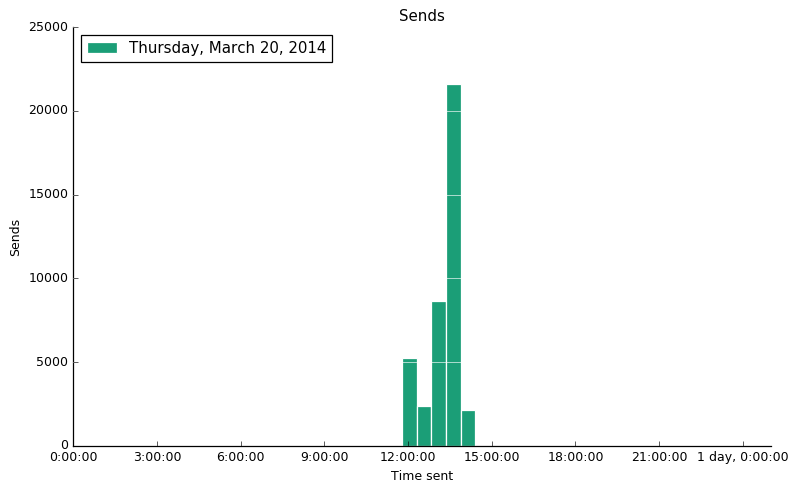

In [24]:
plot_daily(emails,'sends','2014-3-20', '%Y-%m-%d', 'send_time',bins=25)

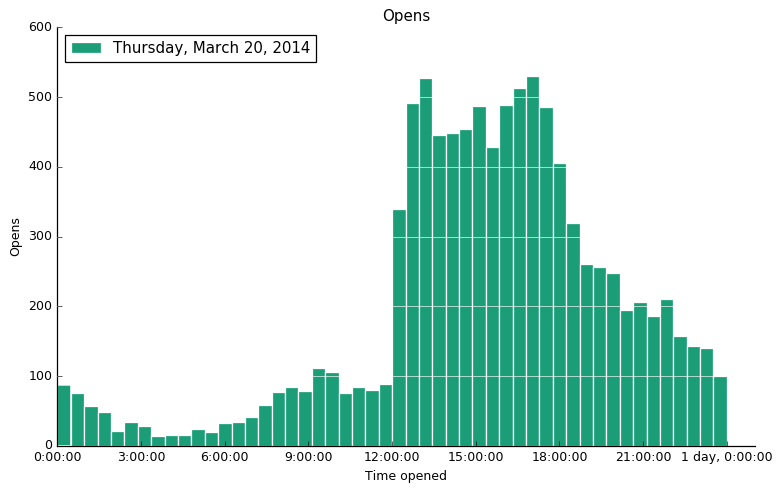

In [25]:
plot_daily(emails,'opens','2014-3-20', '%Y-%m-%d', 'open_time')

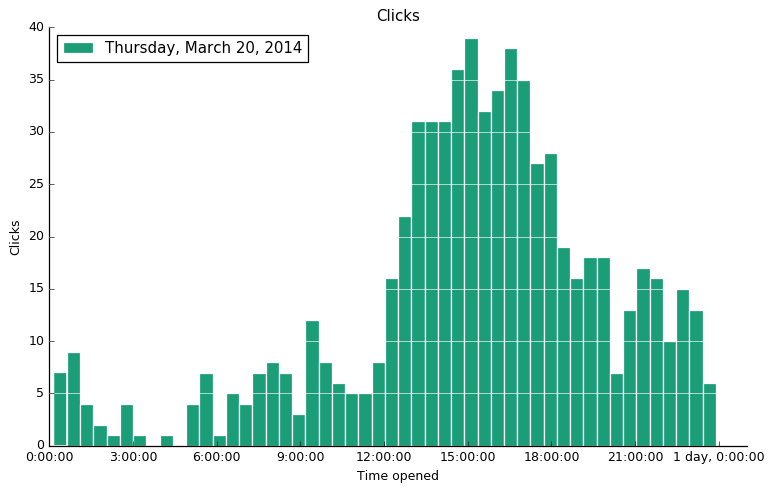

In [26]:
plot_daily(emails,'clicks','2014-3-20', '%Y-%m-%d', 'open_time')

Taking any random sample date for demonstration purposes, we can see that campaigns tend to be delivered nonuniformly throughout the day, and campaigns tend to be sent most frequently between 1-2 PM. On the subscriber side, emails are also opened throughout the day, and they tend to be opened and clicked most frequently between 12-8 PM. 

It is also important to note that these open and click trends are dependent on the timing window in which emails are currently sent. To obtain a more accurate representation of daily variations in subscriber activity, independent of when emails are most commonly sent, we would need to apply a wider and more controlled timing window and frequency.

This analysis is not very useful to us for optimization purposes because it only illustrates the activity levels of both the organization and the subscribers, with no connection drawn between the two. However, the analysis does give insight into the state of our current business processes as well as the daily behavior of our subscribers. Moving forward, analysis of this type can be valuable in detecting changes in subscriber behavior as they occur and devising appropriate decisions and responses on our business end.

Daily activity levels can even be compared by plotting them superimposed on one another, such as can be seen below.

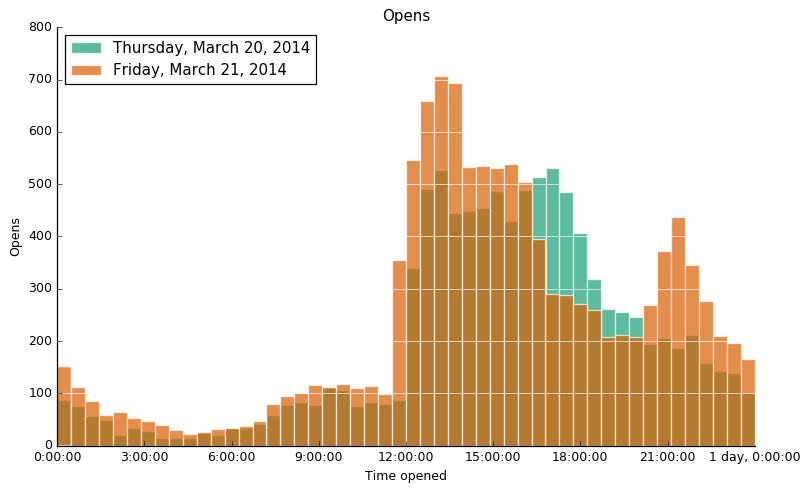

In [27]:
ax = plot_daily(emails,'opens','2014-3-20', '%Y-%m-%d', 'open_time',bins=50, alpha=0.7)
plot_daily(emails,'opens','2014-3-21', '%Y-%m-%d', 'open_time',ax=ax, bins=50, alpha=0.7)

Returning to the analysis, we would again like to draw connections between the variables we can control (such as timing windows and dates) and outcomes (such as opens and clicks). While these relationships can be visualized in a three dimensional graph, it may be more clearly represented on a heat map of our two independent variables, where the magnitude of the outcome is represented chromatically. 

In [28]:
def hourly_counts(data, metric_col, dow_col='send_day', grp_col='send_time'):
    """
    Function
    --------
    hourly_counts
    
    Generate an DataFrame of counts of the specified metric (sends, opens, clicks, etc) given by col_name. The
    counts are the counts of each metric as a result of sending the email at a particular time given by grp_col 
    for each day of the week given by dow_col.
    
    For example, hourly_counts(emails, 'opens') does NOT return an array that reflects the number of emails OPENED at a 
    given time. The array instead reflects the number of emails SENT at a given time that RESULT in openings.
    
    As another example, hourly_counts(emails, 'clicks', dow_col='open_day', grp_col='open_time') returns an array
    that reflects the number emails OPENED at a given time that result in clicks.
    
    Parameters
    ----------
    data: DataFrame
        A DataFrame of email data. The dataframe has rows:
        send_time, open_time, sends, opens, clicks, unsubs, waiting_time, send_day, and open_day.
    metric_col: string
        The name of the metric you want counts of, from the list of:
        sends, opens, clicks, and unsubs.
    dow_col: string
        The name of the day of week metric you want to group by, from the list of:
        send_day and open_day.
        Note: if you use send_day as dow_col, then you must use send_time as grp_col
        and if you use open_day as dow_col, then you must use open_time as grp_col
    grp_col: string
        The name of the day of time of day metric you want to group by, from the list of:
        send_time and open_time.

    Returns
    -------
    counts: DataFrame
        A DataFrame of counts of the specified metric resulting as functions of dow_col and grp_col.
        
    
    Examples
    --------
    
    >> hourly_counts(emails, 'opens')
    
    
            Sun	Mon	Tue	Wed	Thur	Fri	Sat
        send_time							
        0	NaN	NaN	NaN	NaN	NaN	2.0	NaN
        9	NaN	NaN	NaN	2.0	NaN	NaN	NaN
        11	1.0	NaN	NaN	411.0	2938.0	3233.0	3.0
        12	20.0	2.0	72.0	3102.0	2612.0	5262.0	NaN
        13	6912.0	3472.0	1739.0	6334.0	6246.0	2060.0	485.0
        14	3008.0	1280.0	6645.0	NaN	NaN	865.0	5440.0
        15	6.0	4484.0	NaN	NaN	NaN	1898.0	4462.0
        16	NaN	NaN	NaN	NaN	NaN	1.0	1910.0
        17	NaN	NaN	NaN	1.0	NaN	NaN	NaN
        19	NaN	NaN	NaN	NaN	NaN	1.0	NaN
        20	NaN	2.0	NaN	4.0	NaN	NaN	NaN
        21	NaN	NaN	NaN	1.0	NaN	NaN	NaN
        22	NaN	NaN	NaN	3.0	NaN	NaN	NaN
        23	NaN	NaN	NaN	NaN	NaN	3.0	NaN
    
    
    ## To get open rates:
    >> np.divide(hourly_counts(emails, 'opens'), hourly_counts(emails, 'sends'))
    
            Sun	Mon	Tue	Wed	Thur	Fri	Sat
        send_time							
        0	NaN	NaN	NaN	NaN	NaN	1.000000	NaN
        9	NaN	NaN	NaN	1.000000	NaN	NaN	NaN
        11	1.000000	NaN	NaN	0.488124	0.441406	0.190277	1.000000
        12	0.298507	1.000000	0.416185	0.409019	0.402527	0.419684	NaN
        13	0.432243	0.421974	0.398396	0.200570	0.206275	0.391263	0.424694
        14	0.194667	0.389650	0.199024	NaN	NaN	0.152962	0.313852
        15	0.008000	0.187122	NaN	NaN	NaN	0.179175	0.168460
        16	NaN	NaN	NaN	NaN	NaN	1.000000	0.173086
        17	NaN	NaN	NaN	0.500000	NaN	NaN	NaN
        19	NaN	NaN	NaN	NaN	NaN	1.000000	NaN
        20	NaN	1.000000	NaN	1.000000	NaN	NaN	NaN
        21	NaN	NaN	NaN	1.000000	NaN	NaN	NaN
        22	NaN	NaN	NaN	0.750000	NaN	NaN	NaN
        23	NaN	NaN	NaN	NaN	NaN	1.000000	NaN
        

    """
    week_days = {0:'Sun',1:'Mon',2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}
    counts = pd.DataFrame()

    for idx, day  in week_days.items():
        daily_counts = data[(data[dow_col] == idx) & (data[metric_col] == 1)][metric_col].groupby(data[grp_col].dt.hour).sum().rename(day)
        counts = pd.concat([counts, daily_counts], axis=1)
    
    # for index consistency
    idx2 = emails[grp_col].dt.hour.unique()
    idx2 = [i for i in idx2 if str(i) != 'nan']
    idx2 = sorted(idx2)
    counts = counts.reindex(idx2)
    return counts

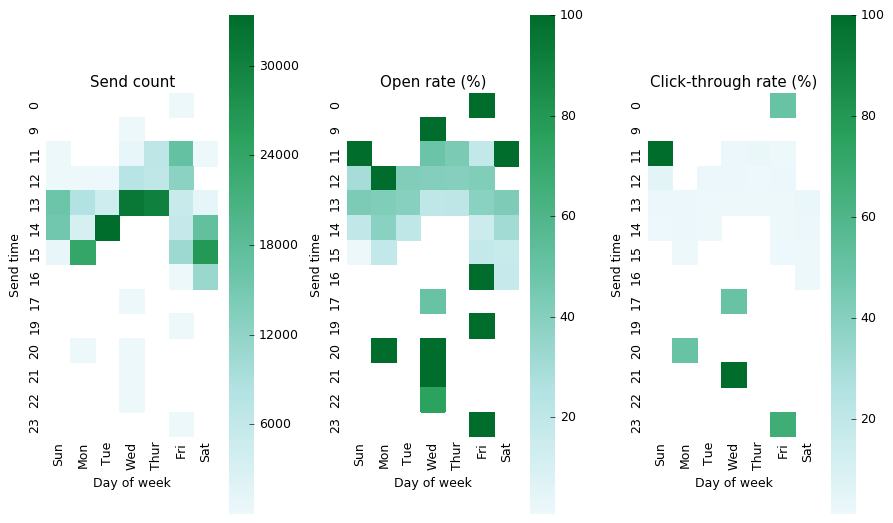

In [29]:
send_counts_st = hourly_counts(emails, 'sends')
open_counts_st = hourly_counts(emails, 'opens')
click_counts_st = hourly_counts(emails, 'clicks')


plt.subplot(1,3,1)
ax = sns.heatmap(send_counts_st, cmap=BuGn_5.mpl_colormap, square=True)
ax.set_ylabel('Send time')
ax.set_xlabel('Day of week')
ax.set_title('Send count')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


plt.subplot(1,3,2)
ax = sns.heatmap(np.divide(100*open_counts_st, send_counts_st), cmap=BuGn_5.mpl_colormap, square=True, annot=False, fmt='0.0f')
ax.set_ylabel('Send time')
ax.set_xlabel('Day of week')
ax.set_title('Open rate (%)')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


plt.subplot(1,3,3)
ax = sns.heatmap(np.divide(100*click_counts_st, send_counts_st), cmap=BuGn_5.mpl_colormap, square=True, annot=False, fmt='0.0f')
ax.set_ylabel('Send time')
ax.set_xlabel('Day of week')
ax.set_title('Click-through rate (%)')
plt.tight_layout()
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

Like before, these visual representations reveal that most emails are delivered within a small timing window, typically between 11-4PM every day. Of these emails, the most successful, measured by open rate, are the ones delivered between 12 and 1 PM. We also see that, like before, click-through rates remain relatively constant, regardless of open rates. 

These heat maps also provide insight into correlations between send frequencies and open rates. It appears that sending higher volumes of emails do not have positive effects on open rates. Rather, it has the opposite effect. High send frequencies tend to correlate with low open rates. Generally, the act of sending emails too frequently negatively impacts the level of engagement per email sent, and we see signs of this in our campaign. As a result, it is worth conducting tests of send frequencies to see if our outcomes can be improved by varying the frequency of email sends so that subscribers do not "burned out" from too many of our emails.

For click-through rates, we are interested in understanding why timing has no effect. One possible explanation might be that the entire timing window is not optimal for subscribers to engagement more deeply with the content. In other words, it may be the case that emails opened at particular times of day make it difficult to engage meaningfully beyond the initial viewing due to restrictions in time and priorities. Then, after the emails are read, they are out of mind and forgotten. 

If that were the case, we might expect that emails opened at different times might have greater click-through rates than our average. To examine this visually, we generate heat maps that illustrate the click-to-open rates at various open times, which reflect the proportions of subscribers who click (given that they have opened the email).

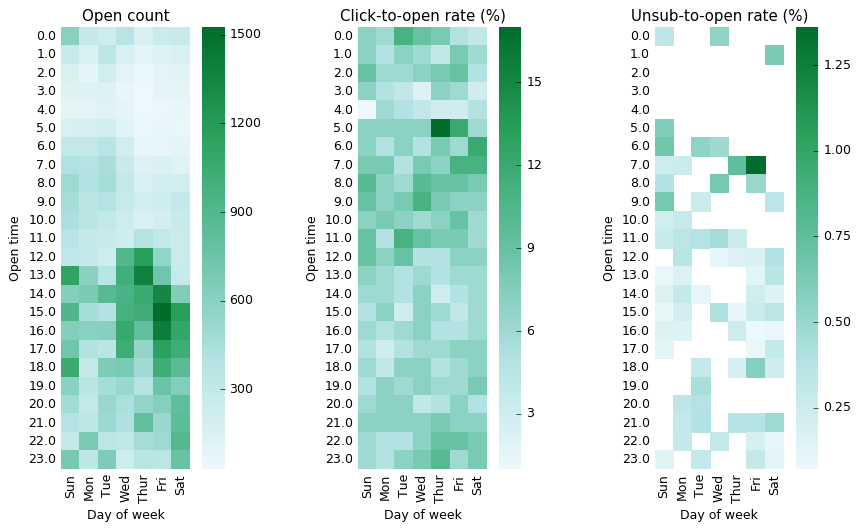

In [30]:
open_counts_ot = hourly_counts(emails, 'opens', dow_col='open_day', grp_col='open_time')
click_counts_ot = hourly_counts(emails, 'clicks', dow_col='open_day', grp_col='open_time')
unsub_counts_ot = hourly_counts(emails, 'unsubs', dow_col='open_day', grp_col='open_time')

plt.subplot(1,3,1)
ax = sns.heatmap(open_counts_ot, cmap=BuGn_5.mpl_colormap, square=True)
ax.set_ylabel('Open time')
ax.set_xlabel('Day of week')
ax.set_title('Open count')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


plt.subplot(1,3,2)
ax = sns.heatmap(np.divide(100*click_counts_ot, open_counts_ot), cmap=BuGn_5.mpl_colormap, square=True, annot=False, fmt='0.0f')
ax.set_ylabel('Open time')
ax.set_xlabel('Day of week')
ax.set_title('Click-to-open rate (%)')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


plt.subplot(1,3,3)
ax = sns.heatmap(np.divide(100*unsub_counts_ot, open_counts_ot), cmap=BuGn_5.mpl_colormap, square=True, annot=False, fmt='0.1f')
ax.set_ylabel('Open time')
ax.set_xlabel('Day of week')
ax.set_title('Unsub-to-open rate (%)')
plt.tight_layout()
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

Like before, we see that the majority of emails are opened between the hours of 12 to 6 pm. We also see that click-to-open rates appear almost random and uniform, independent of the time that the emails were initially opened. This suggests that open time has no direct effect on the click-through rate and implies that our low click-through rates may very well be a question of content and subscriber interest. Subscribers who are already interested in further engagement will engage further with the content, and those who are not will not. Time does not appear to be a big factor.

We can further investigate the effect of timings on click-through rates by examining the waiting times between delivery and opening. If timings have an effect on the outcome, we might expect to see that the levels of engagement are greatest immediately after the emails are delivered and decay as the emails become buried in the inbox with time.

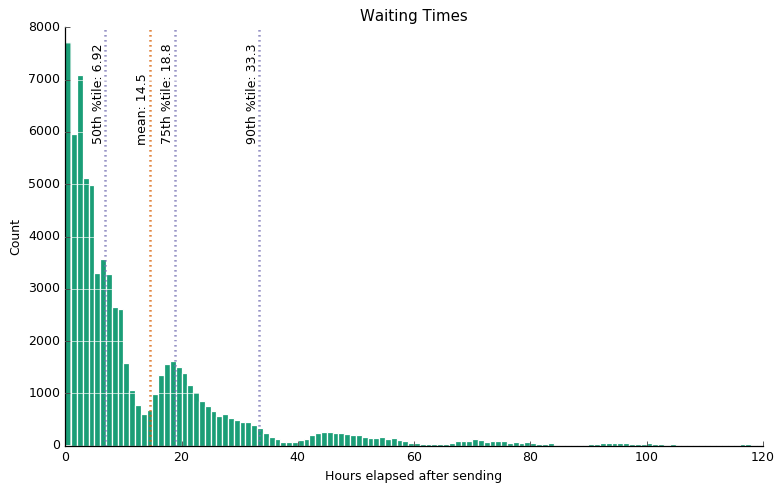

In [31]:
hours_elapsed = emails.waiting_time/pd.Timedelta(hours=1)
ax = hours_elapsed.hist(bins=np.arange(0,120,1))
mean= hours_elapsed.mean()
q50 = hours_elapsed.median()
q75 = hours_elapsed.quantile(0.75)
q90 = hours_elapsed.quantile(0.90)
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.axvline(x = mean, color=Dark2_7.mpl_colors[1], linestyle=':')
plt.text(mean-2.35,6935,'mean: %0.1f' %(mean),rotation=90)
plt.axvline(x = q50, color=Dark2_7.mpl_colors[2], linestyle=':')
plt.text(q50-2.35,7500,'50th %%tile: %0.2f' %(q50),rotation=90)
plt.axvline(x = q75, color=Dark2_7.mpl_colors[2], linestyle=':')
plt.text(q75-2.3,7500,'75th %%tile: %0.1f' %(q75),rotation=90)
plt.axvline(x = q90, color=Dark2_7.mpl_colors[2], linestyle=':')
plt.text(q90-2.3,7500,'90th %%tile: %0.1f' %(q90),rotation=90)
plt.ylabel("Count")
plt.xlabel('Hours elapsed after sending')
plt.title('Waiting Times')
remove_border()

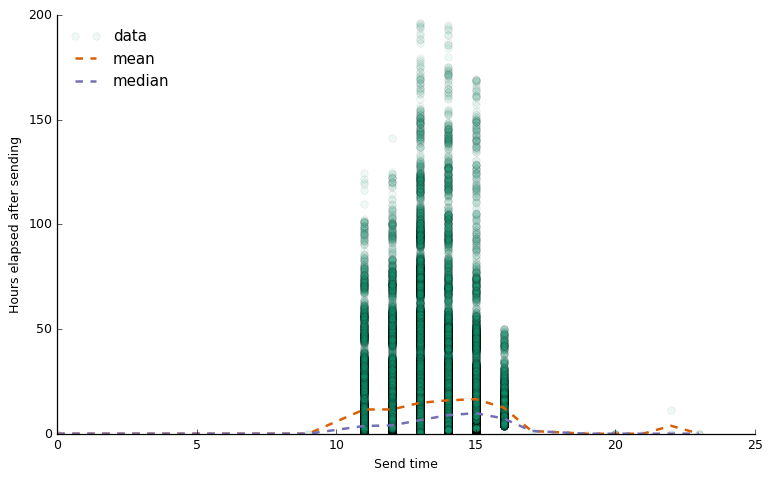

In [32]:
mean_waiting_times = (emails.waiting_time/pd.Timedelta(hours=1)).groupby(emails.send_time.dt.hour).mean()
median_waiting_times = (emails.waiting_time/pd.Timedelta(hours=1)).groupby(emails.send_time.dt.hour).median()
plt.plot(emails.send_time.dt.hour, emails.waiting_time/pd.Timedelta(hours=1), 'o', alpha = 0.07,label='data')
plt.plot(mean_waiting_times.index, mean_waiting_times, '--', label='mean')
plt.plot(mean_waiting_times.index, median_waiting_times, '--', label='median')

plt.xlabel('Send time')
plt.ylabel('Hours elapsed after sending')
plt.legend(frameon = False, loc='upper left')
remove_border()

For open rates, we see that this certainly is the case. Nearly all engagement occurs within two days after delivery. In particular, we see that more than 50 percent of all opened emails are opened within 7 hours of delivery, and more than 90 percent of all opened emails are opened by midday of day two. After two days of being unread, it is unlikely that the email will be opened at all.

It might be expected that clicks follow a similar trend. Intuitively, it would make sense for the subscribers with the greatest interest in our contents to open the emails soon after they are recieved. Similarly, it would make sense that these emails have the highest click-to-open rates because they are opened by highly interested recipients. We can test this hypothesis by looking at the click-to-open rates for emails opened within one day of delivery and emails opened after 1 day had passed.

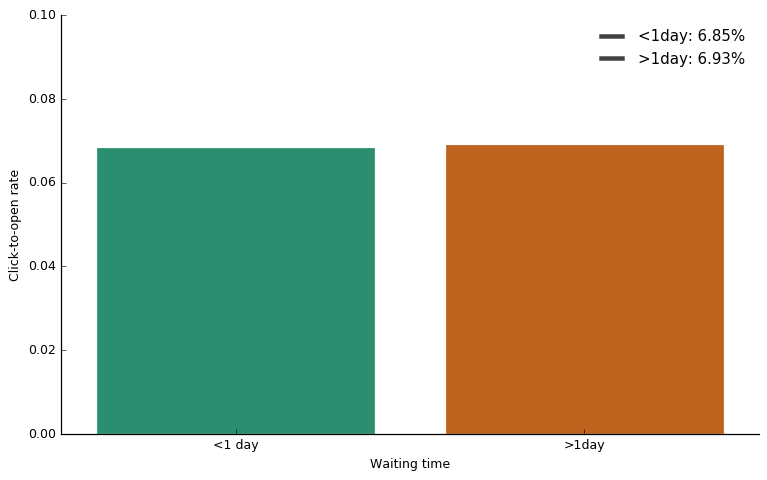

In [33]:
ax = sns.barplot(x = ['<1 day', '>1day'], y = [np.divide(float(1)*emails[emails.waiting_time<datetime.timedelta(days=1)].clicks.sum(), emails[emails.waiting_time<datetime.timedelta(days=1)].opens.sum()), np.divide(float(1)*emails[emails.waiting_time>datetime.timedelta(days=1)].clicks.sum(), emails[emails.waiting_time>datetime.timedelta(days=1)].opens.sum())])
ax.set_xlabel('Waiting time')
ax.set_ylabel('Click-to-open rate')
ax.set_ylim((0, .1))
ax.legend(['<1day: %0.2f' %(100*np.divide(float(1)*emails[emails.waiting_time<datetime.timedelta(days=1)].clicks.sum(), emails[emails.waiting_time<datetime.timedelta(days=1)].opens.sum())) + '%'
           , '>1day: %0.2f' %(100*np.divide(float(1)*emails[emails.waiting_time>datetime.timedelta(days=1)].clicks.sum(), emails[emails.waiting_time>datetime.timedelta(days=1)].opens.sum())) + '%' 
          ], frameon=False)
remove_border()

We see that this, surprisingly, is not the case. In fact, there is no significant difference in click-to-open rate at all between these two segments. This supports the initial hypothesis with our campaign as it is currently designed, timings have no significant impact on whether or not an email gets clicked. Furthermore, click-through rates are independent of initial engagement and interest levels. 

We have deduced through our analysis that, in order to raise click-through rates, we must analyze factors currently not being tracked. In particular, as alluded to previously, we should monitor and analyze factors related to email contents and design, moving forward. When testing, we should pay attention to the efficacy of structure, style, calls to action, links, and other factors which affect the usefulness of our contents.

## Conclusions

The goal of this project was to gain insight into the effectiveness of an organization's email marketing campaign and use those insights to drive improvements in business processes and decision-making. Early on, we identified two metrics which would serve as starting points for understanding the effectiveness of our campaign. The first metric is the open rate, which is a proxy measurement of initial engagement and interest levels. The second metric is the click-through rate, which is a proxy measurement of extended engagement and interest levels. 

Through the analysis of data collected throughout the campaign life cycle, we found that our campaign tends to generate high levels of initial interest but generally fails to maintain interest and reach more meaningful exchanges. We analyzed the relationships between our outcomes and several campaign features, such as send timings and frequencies, and we made a number of constructive discoveries. We saw that open rates possessed noteworthy relationships with these features, which can be leveraged for additional optimization when combined with controlled testing. In contrast, we saw that click-through rates possessed no apparent relationships with these features. In fact, all of our evidence points to content and design  related factors as the critical determinants of whether or not our emails inspire meaningful subscriber interaction. As a result, it is important that these factors are tracked and reviewed moving forward, so that improvements can be made.

### Recommendations

1) __Test and optimize timing windows for email delivery to potentially improve open rates.__ Though open rates are already very high, we saw evidence that they may be optimized further to match the rhythmic pattern of subscriber activity.

2) __Track and test content features, such as structure, style, and links to improve click-through rates.__ Some specific areas to consider might include the optimization of contents to be viewed on both desktop and mobile devices, the relevance of the contents tailored to specific subscriber segments, and effectiveness of links due to factors such as descriptiveness and location.

3) __Track metrics lower in the marketing funnel to to track outcomes beyond the email click, such as leads, sales, and return on investment.__ While opens and clicks are great starting points for analysis, we should integrate our platform to connect these metrics to lower level outcomes in order to more deeply understand effectiveness and make the most of our marketing efforts.